<a href="https://colab.research.google.com/github/NineDERP/PatternFinal/blob/main/Deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

data_dir = "/content/drive/My Drive/Pattern Project"


Mounted at /content/drive


In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam


In [ ]:
train_dir = data_dir
test_dir = data_dir

# Create ImageDataGenerator instances for training and validation
train_datagen = ImageDataGenerator(rescale=1./255,  # Normalize pixel values to [0, 1]
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)  # Only rescale for validation data

# Create data generators for training and validation
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  # Resize images to match model input
    batch_size=32,
    class_mode='categorical')  # Use 'categorical' for multi-class classification

validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical')


Found 1174 images belonging to 3 classes.
Found 1174 images belonging to 3 classes.


In [ ]:
# Define the CNN model
model = Sequential([
    # Convolutional Layer 1
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    # Convolutional Layer 2
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Convolutional Layer 3
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flattening Layer
    Flatten(),

    # Fully Connected Layer 1
    Dense(256, activation='relu'),
    Dropout(0.5),

    # Fully Connected Layer 2 (Output Layer)
    Dense(train_generator.num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             771 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,516,803 (24.86 MB)

 Trainable params: 6,516,803 (24.86 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
batch_size = 32
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=20,
                    steps_per_epoch=train_generator.samples // batch_size,
                    validation_steps=validation_generator.samples // batch_size)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


36/36 ━━━━━━━━━━━━━━━━━━━━ 289s 7s/step - accuracy: 0.3716 - loss: 1.2684 - val_accuracy: 0.4566 - val_loss: 1.0395
Epoch 2/20
 1/36 ━━━━━━━━━━━━━━━━━━━━ 50s 1s/step - accuracy: 0.5312 - loss: 0.9905

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.5312 - loss: 0.9905 - val_accuracy: 0.2273 - val_loss: 1.1676
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.4660 - loss: 1.0506 - val_accuracy: 0.4905 - val_loss: 1.0217
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4062 - loss: 1.0449 - val_accuracy: 0.5455 - val_loss: 0.9940
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.5198 - loss: 1.0155 - val_accuracy: 0.5729 - val_loss: 0.9113
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5312 - loss: 0.9343 - val_accuracy: 0.6818 - val_loss: 0.9212
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.5392 - loss: 0.9592 - val_accuracy: 0.5972 - val_loss: 0.8832
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5625 - loss: 0.9216 - val_accuracy: 0.5000 - val_loss: 0.9245
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 64s 2s/step - accuracy: 0.5665 - loss: 0.9250 - val_accuracy: 0.5825 - val_loss: 0.8922
Epo

In [ ]:
validation_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical')

Found 1174 images belonging to 3 classes.


In [ ]:
test_loss, test_accuracy = model.evaluate(validation_generator)
print(f"Test Accuracy: {test_accuracy:.2f}")

37/37 ━━━━━━━━━━━━━━━━━━━━ 17s 458ms/step - accuracy: 0.6160 - loss: 0.8190
Test Accuracy: 0.61


37/37 ━━━━━━━━━━━━━━━━━━━━ 18s 466ms/step


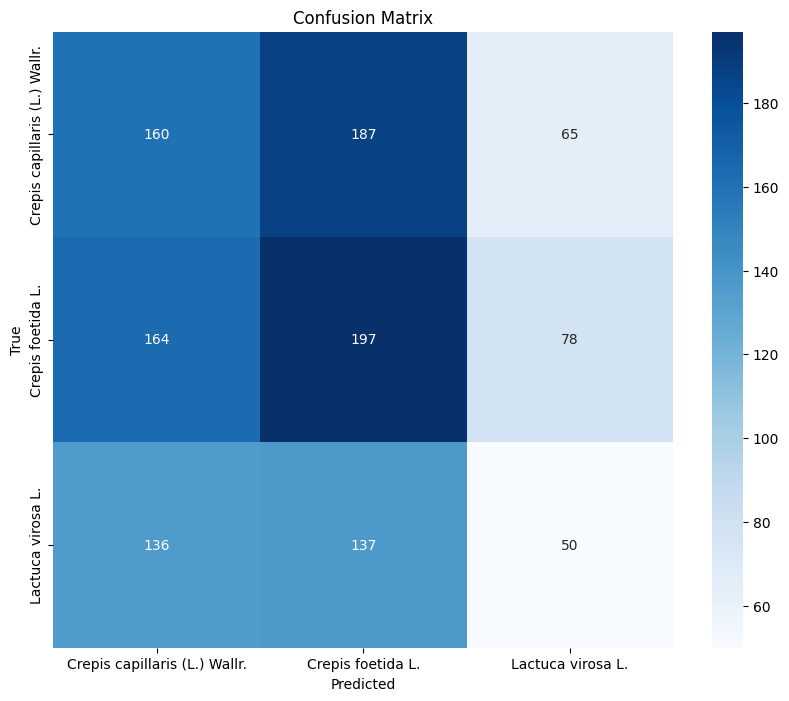

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

Y_pred = model.predict(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

y_true = validation_generator.classes

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=validation_generator.class_indices.keys(),
            yticklabels=validation_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
model.save("plantclef_cnn_model.h5")


In [ ]:
from google.colab import files
files.download('plantclef_cnn_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import tensorflow as tf
model = tf.keras.models.load_model('plantclef_cnn_model.h5')

OSError: Unable to synchronously open file (truncated file: eof = 13631488, sblock->base_addr = 0, stored_eof = 78249008)